In [1]:
label_dict = {0:'daisy', 1:'dandelion', 2:'rose', 3:'sunflower', 4:'tulip'}

train_data_path = './Day_101/ml100marathon-final-exam/image_data/train'

### Refer to https://github.com/lucasdupin/ml-image-scaling/blob/master/1_preprocessing.ipynb

In [3]:
import numpy as np
import matplotlib.pyplot as plt  

from PIL import Image # Make sure you have Pillow! PIL may import but WILL raise exceptions

%matplotlib inline

In [4]:
import os
import sys

original_size = (150, 150)
small_size = (100, 100)

def image_cache_root_path(image_folder):
    return os.path.join(image_folder, '.cache')

def image_cache_folder_path(image_folder, resolution):
    return os.path.join(image_cache_root_path(image_folder), resolution)
    
def image_cache_file_path(image_folder, image_file, resolution):
    return os.path.join(image_cache_folder_path(image_folder, resolution), image_file)
    

def process_image(folder, image_path, image_cache_high, image_cache_low):
    """ Resizes an image, creating a big and a reduced version """
    
    # Skip files that already were generated or directories
    if os.path.exists(image_cache_high) and os.path.exists(image_cache_low):
        return
    
    with Image.open(image_path) as original:
  
        # Ignore images smaller than our target size
        if original.size[0] < original_size[0] or original.size[1] < original_size[1]:
            # print("image %s with size %s is too small, skipping..." % (image_path, original.size))
            return

        #print("resizing and cropping: %s" % image_path)
        center = (original.size[0]/2, original.size[1]/2)
        size = original_size[0]
        cropped = original.crop((center[0] - size/2, 
                                 center[1] - size/2, 
                                 center[0] + size/2,
                                 center[1] + size/2))
        # High-res version - labels
        cropped.save(image_cache_high)
        # Generate low-res version of the image - train data
        small = cropped.resize(small_size, Image.ANTIALIAS)
        small.save(image_cache_low)


def process_imagefolder_recursive(folder):
    
    print("Processing folder %s" % (folder))
    #print(".", end="")
    
    image_cache_root = image_cache_root_path(folder)
    if not os.path.exists(image_cache_root):
        os.mkdir(image_cache_root)

    image_cache_folder_high = image_cache_folder_path(folder, 'high')
    if not os.path.exists(image_cache_folder_high):
        os.mkdir(image_cache_folder_high)

    image_cache_folder_low = image_cache_folder_path(folder, 'low')
    if not os.path.exists(image_cache_folder_low):
        os.mkdir(image_cache_folder_low)

    # Get list of all image folders
    for d in sorted(os.listdir(folder)):
        
        # Ignore cache itself
        if d.startswith("."):
            continue
        
        # Recursive to folder
        if os.path.isdir(os.path.join(folder, d)):
            process_imagefolder_recursive(os.path.join(folder, d))
            continue

        # Check picture only
        if d.lower().endswith(('.jpg', 'png')):
            image_path = os.path.join(folder, d)
            image_cache_high = image_cache_file_path(folder, d, 'high')
            image_cache_low = image_cache_file_path(folder, d, 'low')
            process_image(folder, image_path, image_cache_high, image_cache_low)
        
process_imagefolder_recursive('.\Day_101\ml100marathon-final-exam\image_data')
        
print("Done!")

Processing folder .\Day_101\ml100marathon-final-exam\image_data
Processing folder .\Day_101\ml100marathon-final-exam\image_data\test
Processing folder .\Day_101\ml100marathon-final-exam\image_data\train
Processing folder .\Day_101\ml100marathon-final-exam\image_data\train\daisy
Processing folder .\Day_101\ml100marathon-final-exam\image_data\train\dandelion
Processing folder .\Day_101\ml100marathon-final-exam\image_data\train\rose
Processing folder .\Day_101\ml100marathon-final-exam\image_data\train\sunflower
Processing folder .\Day_101\ml100marathon-final-exam\image_data\train\tulip
Done!


In [6]:
import imageio

In [7]:
# Read image file to memory as RGB array
def load_image_to_rgb(image_path):
    im = imageio.imread(image_path)
    # print(im.shape)
    return im


In [8]:
import numpy as np

In [9]:
def load_image_and_label(folder):
    image_array = np.empty((0, 100, 100, 3), int)
    print(f'image_array.shape = {image_array.shape}')
    for d in os.listdir(folder):
        if not d.lower().endswith(('.jpg', 'png')):
            continue
        im = load_image_to_rgb(os.path.join(folder, d))
        if im is None:
            print(f'Error when loading image:{os.path.join(folder, d)}')
            continue
        # img_array[count] = im
        #print(f'im.shape = {im.shape}')
        a = np.empty((1, 100, 100, 3), int)
        a[0] = im
        image_array = np.append(image_array, a, axis=0)
        # print(f'image_array.shape = {image_array.shape}')
        
    count = len(image_array)
    return (image_array, count)

In [10]:

x_img_train = np.empty((0, 100, 100, 3), int)
y_label_train = np.empty((0, 1), int)

for index, flower in label_dict.items():
    print(f'Processing training data, flower={flower}, index={index}')
    image_cache_low = image_cache_folder_path(os.path.join('.\Day_101\ml100marathon-final-exam\image_data', 'train', flower), 'low')
    
    x, count = load_image_and_label(image_cache_low)
    x_img_train = np.append(x_img_train, x, axis = 0)
    
    y = [[ index ] for x in range(0, count)]
    y_label_train = np.append(y_label_train, np.asarray(y), axis = 0)
    
    print(x_img_train.shape, y_label_train.shape)
    
print(x_img_train[0])
print(y_label_train)

Processing training data, flower=daisy, index=0
image_array.shape = (0, 100, 100, 3)
(489, 100, 100, 3) (489, 1)
Processing training data, flower=dandelion, index=1
image_array.shape = (0, 100, 100, 3)
(1163, 100, 100, 3) (1163, 1)
Processing training data, flower=rose, index=2
image_array.shape = (0, 100, 100, 3)
(1658, 100, 100, 3) (1658, 1)
Processing training data, flower=sunflower, index=3
image_array.shape = (0, 100, 100, 3)
(2145, 100, 100, 3) (2145, 1)
Processing training data, flower=tulip, index=4
image_array.shape = (0, 100, 100, 3)
(2726, 100, 100, 3) (2726, 1)
[[[100 153 223]
  [ 35 132 213]
  [  0 138 237]
  ...
  [  1 129 238]
  [  1 129 238]
  [  1 129 238]]

 [[107 160 228]
  [ 43 138 218]
  [  0 140 238]
  ...
  [  1 129 238]
  [  1 129 238]
  [  1 129 238]]

 [[118 169 234]
  [ 56 148 225]
  [  0 143 239]
  ...
  [  1 129 238]
  [  1 129 238]
  [  1 129 238]]

 ...

 [[248 239 232]
  [247 238 231]
  [244 237 229]
  ...
  [  2 113 247]
  [  3 114 248]
  [  4 115 249]]

In [11]:
# Load testing flower data
x_img_test = np.empty((0, 100, 100, 3), int)
y_label_test = np.empty((0, 1), int)

print(f'Processing testing flower')

image_cache_low = image_cache_folder_path(os.path.join('.\Day_101\ml100marathon-final-exam\image_data', 'test'), 'low')
x, count = load_image_and_label(image_cache_low)
x_img_test = np.append(x_img_test, x, axis = 0)
    
y = [[ 0 ] for x in range(0, count)]
y_label_test = np.append(y_label_test, np.asarray(y), axis = 0)
    
print(x_img_test.shape, y_label_test.shape)
print(x_img_test[0])
print(y_label_test)

Processing testing flower
image_array.shape = (0, 100, 100, 3)
(1939, 100, 100, 3) (1939, 1)
[[[146 138 153]
  [173 152 169]
  [218 177 195]
  ...
  [173 179 195]
  [173 179 195]
  [172 178 194]]

 [[140 126 141]
  [191 167 183]
  [214 171 190]
  ...
  [173 179 195]
  [173 179 195]
  [172 178 194]]

 [[150 128 141]
  [212 180 195]
  [203 154 173]
  ...
  [173 179 195]
  [173 179 195]
  [172 178 194]]

 ...

 [[200 201 206]
  [200 201 206]
  [198 201 206]
  ...
  [170 148 161]
  [171 149 162]
  [167 143 157]]

 [[200 201 206]
  [200 201 206]
  [198 201 206]
  ...
  [168 140 155]
  [170 139 155]
  [165 132 149]]

 [[200 201 206]
  [200 201 206]
  [198 201 206]
  ...
  [167 128 147]
  [168 126 146]
  [161 119 139]]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [12]:

def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    # gcf: Get Current Figure
    fig = plt.gcf()
    fig.set_size_inches(10, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title = str(i) + ',' + label_dict[labels[i][0]]
        if len(prediction)>0:
            title += '=>' + label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

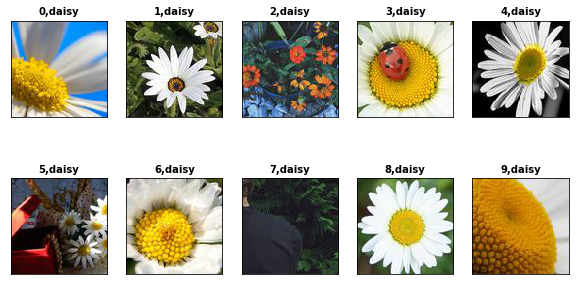

In [13]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [14]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (1939, 100, 100, 3)
y_label_test : (1939, 1)


# Image normalize 

In [15]:
# Show first pixel
x_img_train[0][0][0]

array([100, 153, 223])

In [16]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [17]:
# Normalize R,G,B to 0.0 ~ 1.0
x_img_train_normalize[0][0][0]

array([0.39215687, 0.6       , 0.8745098 ], dtype=float32)

# 轉換label 為OneHot Encoding

In [18]:
y_label_train.shape

(2726, 1)

In [19]:
y_label_train[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [20]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

Using TensorFlow backend.


In [21]:
y_label_train_OneHot.shape

(2726, 5)

In [22]:
y_label_train_OneHot[:5]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)